In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [3]:
# load the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

#### Description of Features:

- age : age of the patient

- sex: sex of patient (1 = female, 0 = male)

- cp : type of chest pain (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic)

- trtbps : resting blood pressure (in mm Hg)

- fbs : fasting blood sugar > 120 mg/dl (1 = true, 0 = false)

- chol : cholestoral in mg/dl fetched via BMI sensor

- restecg : resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)

- thalachh : maximum heart rate

- exng : exercise induced angina (1 = yes, 0 = no)

- oldpeak : previous peak

- slp : slope

- caa : number of major vessels (0-4)

- thall : thalium stress test result(0-3)

- output : target variable (0 = less chance of heart attack, 1= more chance of heart attack)

#### Information about data

In [4]:
# load dataset
df = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")

In [5]:
# overal view of data
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# number of rows and columns
df.shape

(303, 14)

#### This dataset has 303 rows and 14 columns.

In [7]:
# columns of data, their number and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# statistical features of data
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Cleaning

#### Duplicated Values

In [9]:
# number of duplicated values
df.duplicated().sum()

1

#### There is only one duplicated entry. So, I will drop it in the next section.

In [10]:
# delete duplicated rows in data
df.drop_duplicates()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


#### Null values

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### There is no feature with null values.

## Data Visualization

#### Distribution of features

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>],
       [<AxesSubplot:title={'center':'trtbps'}>,
        <AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>],
       [<AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>,
        <AxesSubplot:title={'center':'exng'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>]],
      dtype=object)

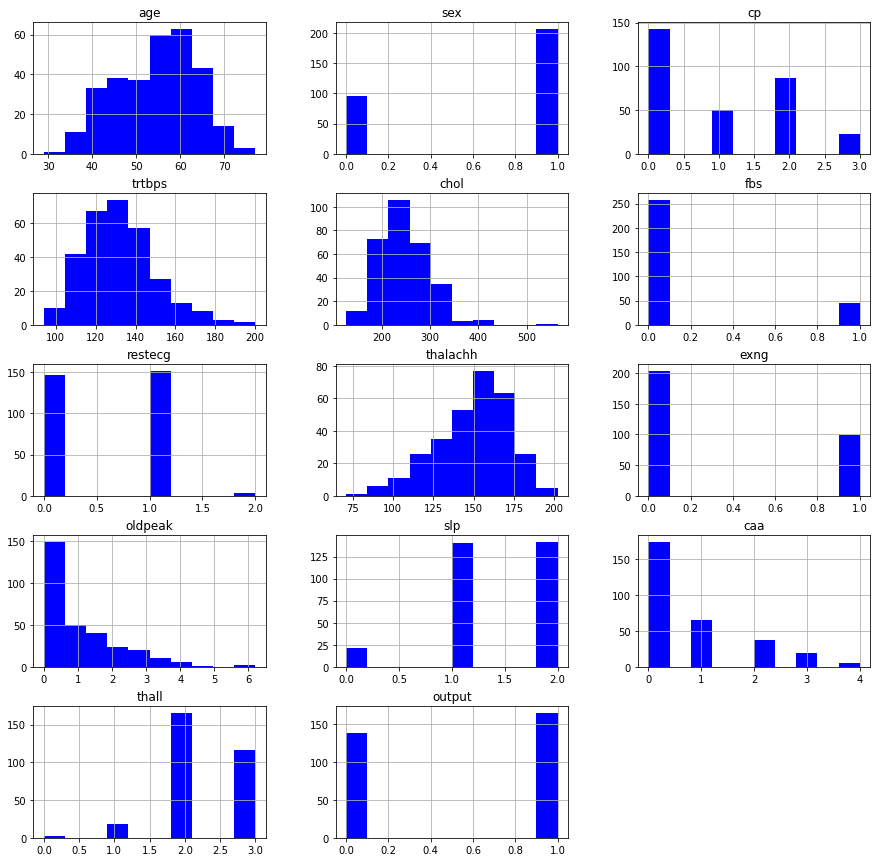

In [67]:
# plot the features
df.hist(layout=(5,3), figsize=(15,15), color = "b")

> #### 1. Total number of cases with typical angina chest pain approximately is equal to sum of the atypical angina, non-anginal pain and asymptomatic chest pain.
> #### 2. The dataset is more for age between 40-65.
> #### 3. The data consists of more than twice for females than males.
> #### 4. trtbps and chol are normally distributed but thalachh is skewed towards right.

#### Correlation of features

<AxesSubplot:>

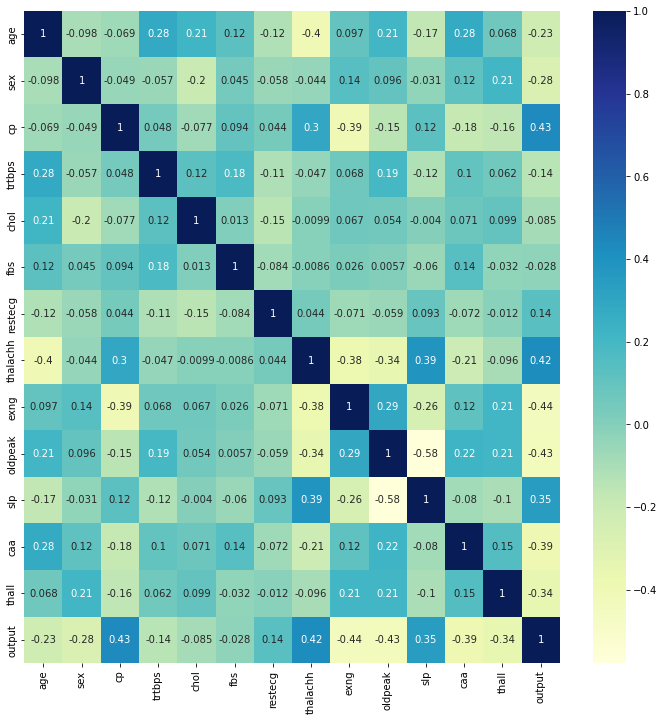

In [13]:
# plot correlation of features
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

#### According to heatmap, Probably the most correlated features with output are type of chest pain, maximum heart rate and slope respectively.

#### Target Value (output)

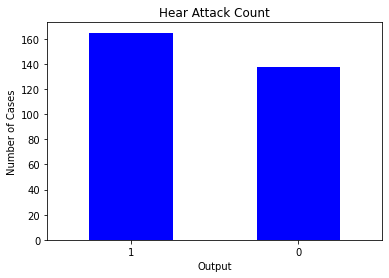

In [38]:
# plot the target value (output) 
df.output.value_counts().plot(kind = "bar", color = "b")
plt.title("Hear Attack Count")
plt.xlabel("Output")
plt.ylabel("Number of Cases")
plt.xticks(rotation = 0)
plt.show()

### Categorical Features:
- sex
- cp
- fbs
- restecg
- exng
- slp
- caa
- thall

Text(0.5, 1.0, 'sex vs. output')

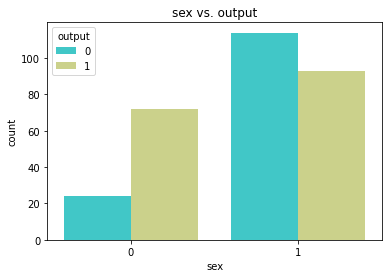

In [15]:
# relation of feature sex and output  
sns.countplot(data=df, x = 'sex', hue = 'output', palette = 'rainbow')
plt.title("sex vs. output")

> #### The probability of heart attack between males is more than females.

Text(0.5, 1.0, 'Chest pain Type vs. output')

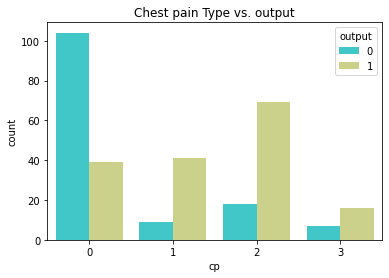

In [47]:
# relation of feature cp and output  
sns.countplot(data=df, x = 'cp', hue = 'output', palette = 'rainbow')
plt.title("Chest pain Type vs. output")

> #### People with typical angina chest pain has more chance of heart attack.

Text(0.5, 1.0, 'Fasting blood sugar vs. output')

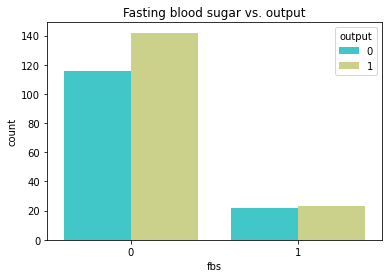

In [29]:
# relation of feature fbs and output  
sns.countplot(data=df, x = 'fbs', hue = 'output', palette = 'rainbow')
plt.title("asting blood sugar vs. output")

> #### People who have Fasting blood sugar less than 120, have more chance of heart attack.

Text(0.5, 1.0, 'Resting electrocardiographic results vs. output')

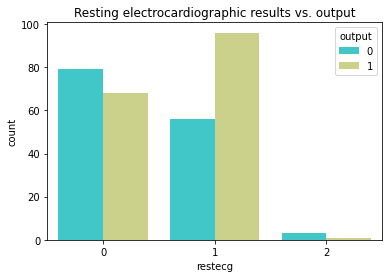

In [30]:
# relation of feature restecg and output  
sns.countplot(data=df, x = 'restecg', hue = 'output', palette = 'rainbow')
plt.title("Resting electrocardiographic results vs. output")

> #### People with ST-T wave abnormality have more chance of heart attack.

Text(0.5, 1.0, 'Exercise induced angina vs. output')

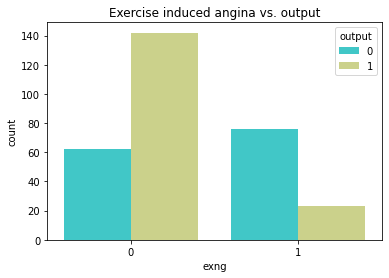

In [31]:
# relation of feature exng and output  
sns.countplot(data=df, x = 'exng', hue = 'output', palette = 'rainbow')
plt.title("Exercise induced angina vs. output")

> #### People without exercise induced angina have more heart attack.

Text(0.5, 1.0, 'Slope vs. output')

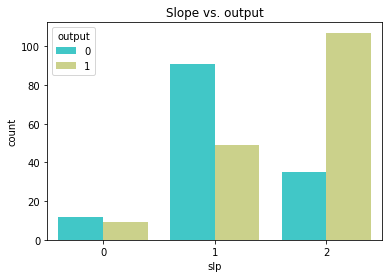

In [39]:
# relation of feature slp and output  
sns.countplot(data=df, x = 'slp', hue = 'output', palette = 'rainbow')
plt.title("Slope vs. output")

> #### In slope=2, the number of people with heart attack are more than other slopes.

Text(0.5, 1.0, 'Number of vessels vs. output')

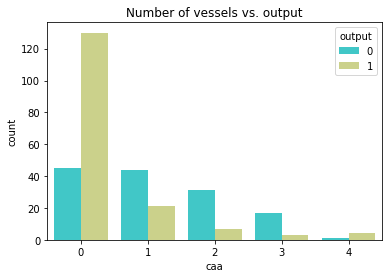

In [40]:
# relation of feature caa and output  
sns.countplot(data=df, x = 'caa', hue = 'output', palette = 'rainbow')
plt.title("Number of vessels vs. output")

> #### Cases with zero number of major vessels have more chance of heart attack compared to people with 1,2,3 or 4 major vessels. 

Text(0.5, 1.0, 'Thal rate vs. output')

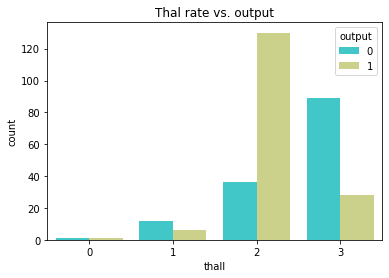

In [41]:
# relation of feature thall and output  
sns.countplot(data=df, x = 'thall', hue = 'output', palette = 'rainbow')
plt.title("Thal rate vs. output")

> #### People with thalium stress test result = 2 have higher risk of heart attack.

### Continuous Features:
- age
- trtbps 
- chol
- thalachh
- oldpeak

Text(0.5, 1.0, 'Age vs. output')

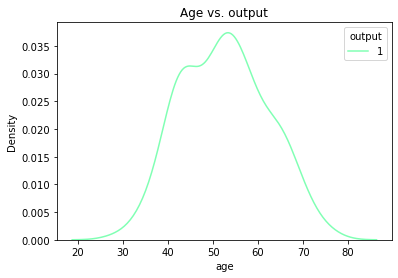

In [69]:
# relation of feature age and output  
sns.kdeplot('age',hue = 'output', data = df[df['output'] == 1], palette = 'rainbow')
plt.title("Age vs. output")

> #### It seems that elder people might have higher chances of heart attack but it is evident that this isn't the true.

Text(0.5, 1.0, 'Resting blood pressure vs. output')

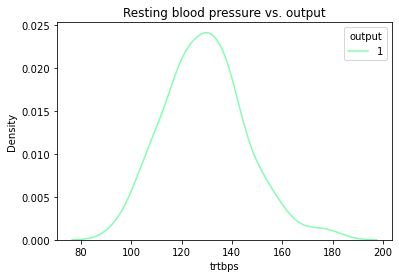

In [70]:
# relation of feature trtbps and output  
sns.kdeplot('trtbps',hue = 'output', data = df[df['output'] == 1], palette = 'rainbow')
plt.title("Resting blood pressure vs. output")

Text(0.5, 1.0, 'Cholestoral vs. output')

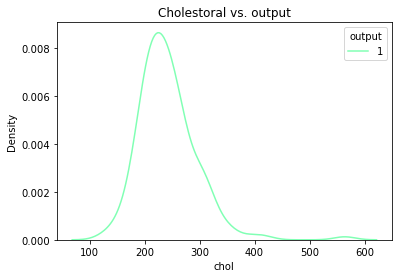

In [71]:
# relation of feature chol and output  
sns.kdeplot('chol',hue = 'output', data = df[df['output'] == 1], palette = 'rainbow')
plt.title("Cholestoral vs. output")

Text(0.5, 1.0, 'Maximum heart rate vs. output')

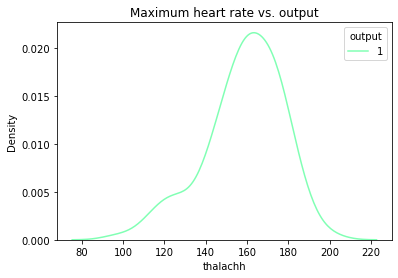

In [72]:
# relation of feature thalachh and output  
sns.kdeplot('thalachh',hue = 'output', data = df[df['output'] == 1], palette = 'rainbow')
plt.title("Maximum heart rate vs. output")

> #### People with higher maximum heart rate have higher chances of heart attack.

Text(0.5, 1.0, 'Previous peak achieved vs. output')

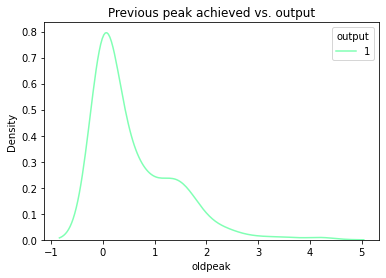

In [73]:
# relation of feature oldpeak and output  
sns.kdeplot('oldpeak',hue = 'output', data = df[df['output'] == 1], palette = 'rainbow')
plt.title("Previous peak achieved vs. output")

> #### People with lower pevious peak achieved have higher probability of heart attack.

## Conlusion

1. Total number of cases with typical angina chest pain approximately is equal to sum of the atypical angina, non-anginal pain and asymptomatic chest pain.
2. The dataset is more for age between 40-65.
3. The data consists of more than twice for females than males.
4. According to heatmap matrix, there might be correlation between output and cp, thalachh and slp.
5. The probability of heart attack between males is more than females.
6. People with typical angina chest pain has more chance of heart attack.
7. People who have Fasting blood sugar less than 120, have more chance of heart attack.
8. People with ST-T wave abnormality have more chance of heart attack.
9. People without exercise induced angina have more heart attack.
10. Cases with zero number of major vessels have more chance of heart attack.
11. People with thalium stress test result = 2 have higher risk of heart attack.
12. It seems that elder people might have higher chances of heart attack but it is evident that this isn't the true.
13. People with higher maximum heart rate have higher chances of heart attack.
14. People with lower pevious peak achieved have higher probability of heart attack.
